## Looking at all tanks from 26 MT

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [4]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
tanks = (2601,2603,2604)  # List of tank IDs you want to query
ProductionTanks_df = ProductionTank.query('Tank_1 in @tanks')
print(ProductionTanks_df)

      Material    BATCHID  Tank_1  \
313    1036590  107671161    2601   
314    1036590  107671161    2601   
315    1036590  107671161    2601   
316    1036590  107671161    2601   
317    1036590  107671161    2601   
...        ...        ...     ...   
9106   3041211  107718990    2601   
9107   3041211  107718990    2601   
9108   3041211  107718990    2601   
9109   3041211  107718990    2601   
9110   3041211  107718990    2601   

                                   Instruction_Step INGRED_ID  \
313                            S3_BATCH_IN_PROGRESS       NaN   
314                                      STEP1_CONS   1002565   
315                                      STEP1_CONS   1037802   
316                                      STEP1_CONS   1002818   
317                                      STEP1_CONS   1002910   
...                                             ...       ...   
9106                TAKE A SAMPLE AND SUBMIT FOR QA       NaN   
9107  SAMPLE TO LAB.RESULTS OK?. (N

In [6]:
# Group by 'Batch' and extract the 'Quantity' for the 'HP' instruction step
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()

print(hp_quantities)

BATCHID
107559262    2403.216
107579279    1201.289
107588989    1802.810
107599314    2401.484
107599992    2401.728
107609604    1904.502
107628743    2396.470
107642480    1051.710
107657881    2400.414
107671161    2404.640
107691051    2402.260
107700556    2404.262
107718990    1251.617
107720157    2399.784
107731815    2398.064
107734265    2404.892
107743160    2399.854
107748062    1199.883
107759327    2404.122
107769534    2027.026
107776897    1402.832
107784321    1802.086
107792342    1000.244
107795797    2404.176
107796944    2400.378
107807261    1200.404
107817306    1400.218
107831957    1199.861
107842003     960.814
107873947    2402.812
107880059    2403.674
107899139    1798.206
107913400    2429.396
107924004    2400.922
107936750    2429.406
107956532    2400.720
107970928    2401.834
107983966    2399.656
107988686    2001.066
108002422    1201.207
108037928     850.426
108037929    1700.596
108046604    2399.872
108060668    2401.714
108080114    2402.252
10

In [7]:
# Extracting the 'Quantity' for the 'HP' instruction step for each 'BATCHID'
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()

# Aggregating data per tank
aggregated_ProductionTank26_df1 = ProductionTanks_df.groupby(['BATCHID','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay': 'sum',
    #'Quantity': 'sum',
    'Flowrate_KGMIN': 'mean',
    'Target_Phase_duration': 'mean',
    'Target_Flowrate': 'mean'
}).reset_index()

# Merging the aggregated data with the HP quantities
aggregated_ProductionTank26_df1 = aggregated_ProductionTank26_df1.merge(hp_quantities, on='BATCHID', how='left', suffixes=('', '_from_HP'))

# Print the resulting DataFrame
print(aggregated_ProductionTank26_df1)

       BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0    107559262    2601             186           14.0                  4   
1    107559262    2604             487          294.0               1303   
2    107579279    2601             412          251.0               1078   
3    107579279    2603              85            1.0                 27   
4    107588989    2603             176           31.0                  5   
..         ...     ...             ...            ...                ...   
102  108080114    2603             169           54.0                148   
103  108080114    2604             193           25.0                  4   
104  108081814    2601             343           57.0                  7   
105  108081814    2603             158           59.0                  5   
106  108081814    2604             336          126.0                308   

     Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  Quantity  
0          2.50

In [8]:
#Aggregate data per tank
aggregated_ProductionTank26_df2 = ProductionTanks_df.groupby(['BATCHID','Material','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank26_df2)

       BATCHID  Material  Tank_1  Phase_duration  Phase_overrun  \
0    107559262   1045448    2601             186           14.0   
1    107559262   1045448    2604             487          294.0   
2    107579279   1985101    2601             412          251.0   
3    107579279   1985101    2603              85            1.0   
4    107588989   1513667    2603             176           31.0   
..         ...       ...     ...             ...            ...   
102  108080114   1036590    2603             169           54.0   
103  108080114   1036590    2604             193           25.0   
104  108081814   1985101    2601             343           57.0   
105  108081814   1985101    2603             158           59.0   
106  108081814   1985101    2604             336          126.0   

     Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0             0.666667         15.0201              30.500000        14.857700  
1           100.230769         89

## EDA on Tanks 26mt

In [9]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels

In [10]:
# Just looks at batchid details produced in tank 22MT
df = pd.DataFrame(aggregated_ProductionTank26_df1)
# Just looks at batchid and materials details produced in tank 22MT
df2 = pd.DataFrame(aggregated_ProductionTank26_df2)

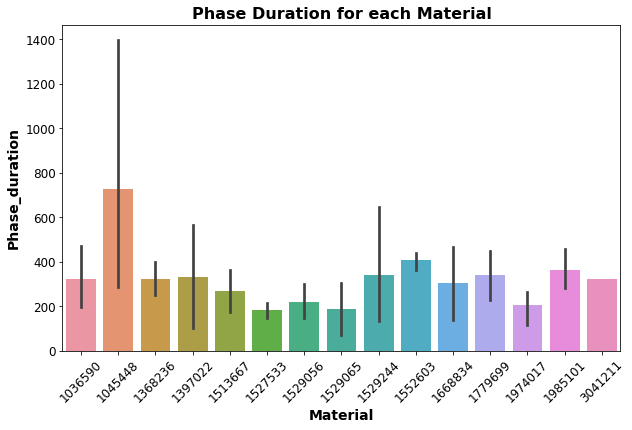

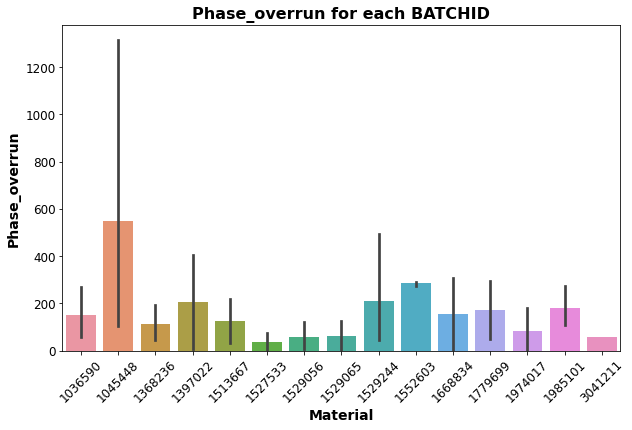

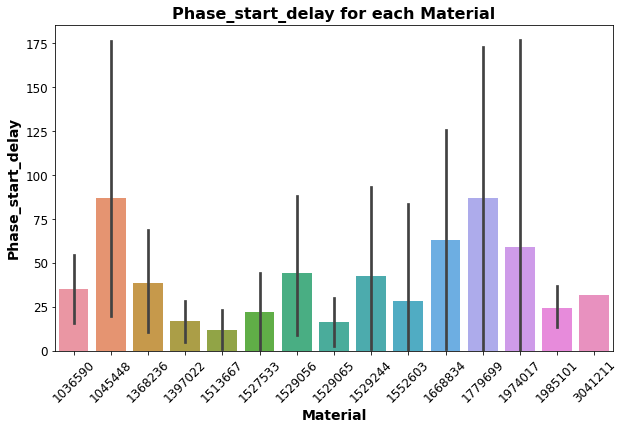

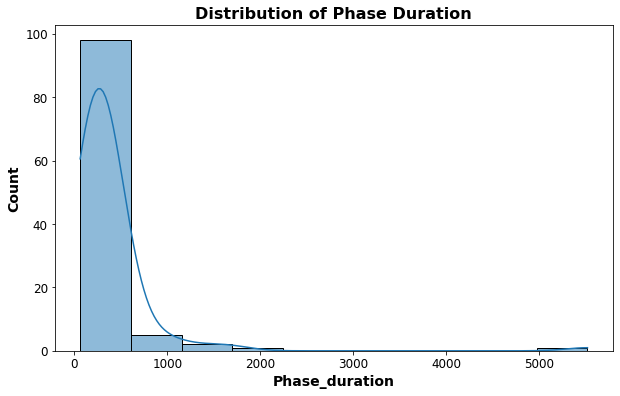

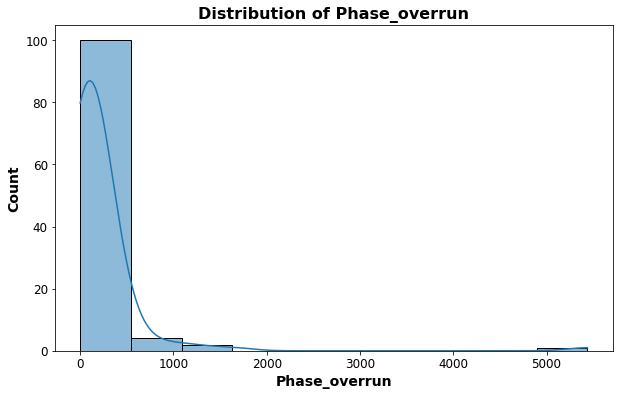

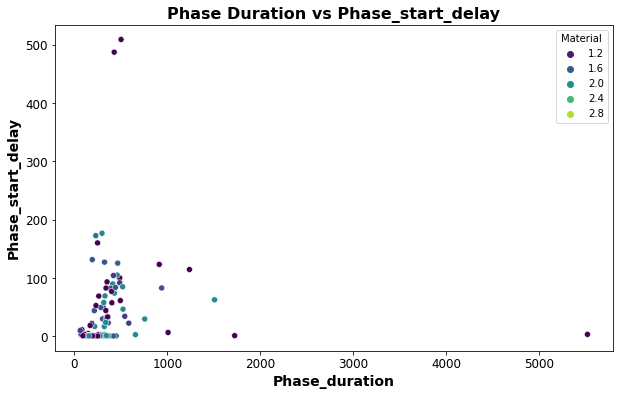

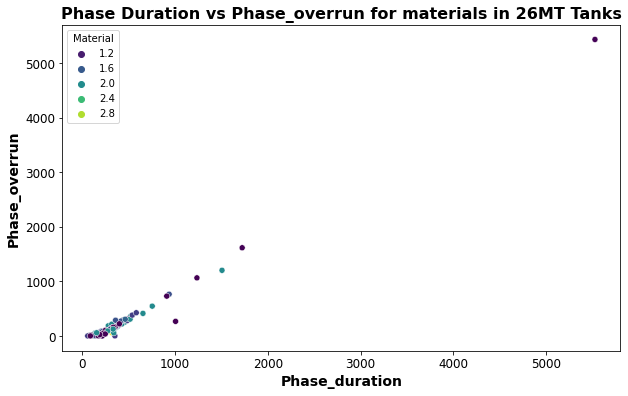

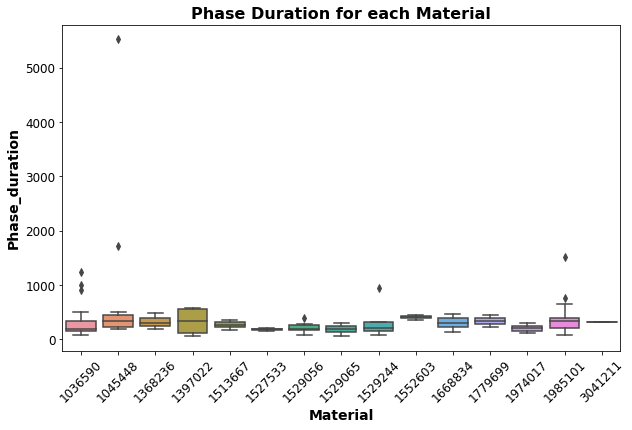

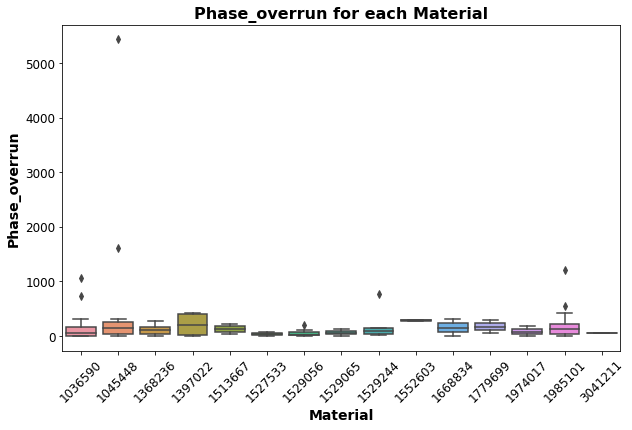

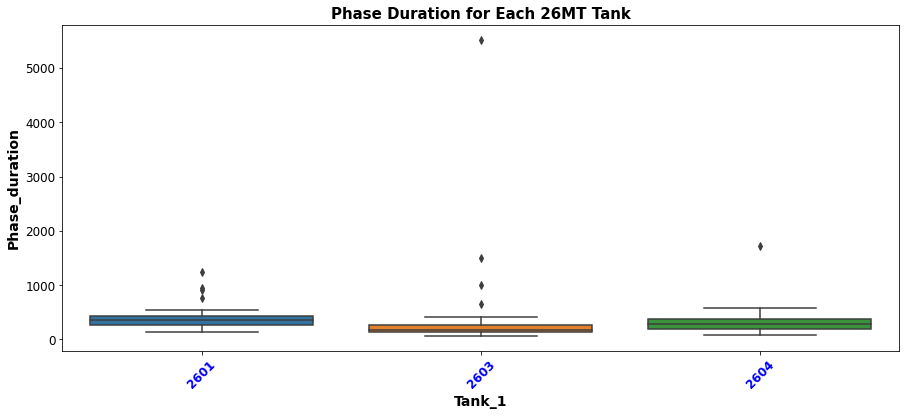

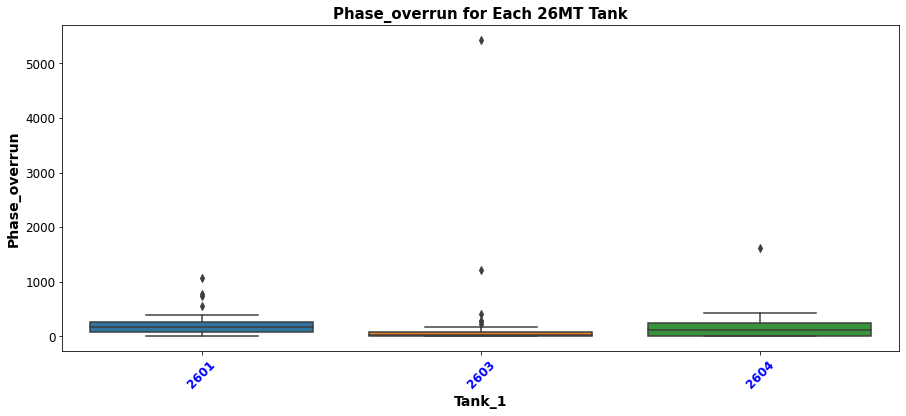

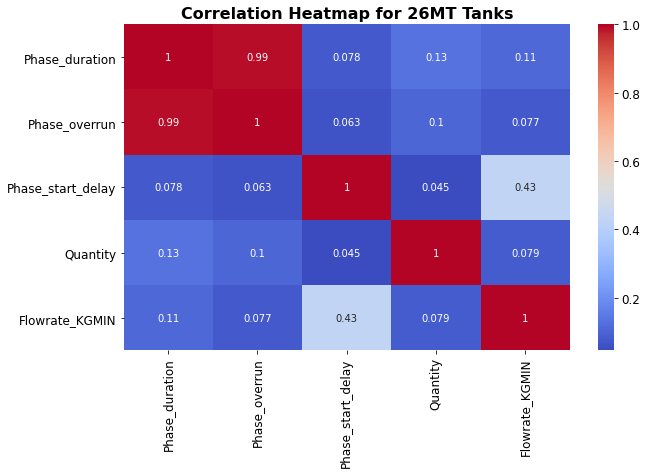

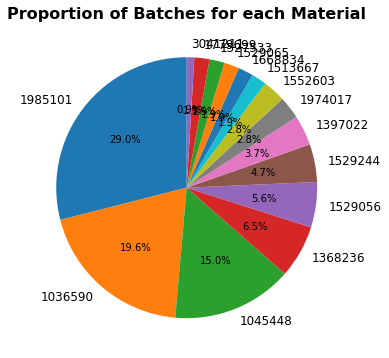

,BATCHID,Material,Tank_1,Phase_duration,Phase_overrun,Phase_start_delay,Flowrate_KGMIN,Target_Phase_duration,Target_Flowrate
count,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,83.000000
mean,1.078171e+08,1.511015e+06,2602.457944,382.822430,213.392523,41.172206,42.431892,21.963933,17.569338
std,1.505599e+05,4.182814e+05,1.261030,568.126278,565.770234,77.163994,44.405188,13.392967,2.771082
min,1.075593e+08,1.036590e+06,2601.000000,62.000000,0.000000,0.500000,0.000000,11.300000,14.807422
25%,1.077098e+08,1.045448e+06,2601.000000,176.500000,14.000000,0.666667,8.709050,15.045455,14.857700
50%,1.077958e+08,1.529056e+06,2603.000000,284.000000,102.000000,3.250000,15.416000,16.307692,18.609300
75%,1.079368e+08,1.985101e+06,2604.000000,401.500000,220.500000,59.548077,77.397550,30.500000,19.675987
max,1.080818e+08,3.041211e+06,2604.000000,5523.000000,5438.000000,509.230769,171.455600,126.333333,23.106071


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(aggregated_ProductionTank26_df1)
df2 = pd.DataFrame(aggregated_ProductionTank26_df2)

# 1. Bar Chart - Phase_duration for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_Overrun for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each BATCHID')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_start_delay for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_start_delay', data=df2)
plt.title('Phase_start_delay for each Material')
plt.xticks(rotation=45)
plt.show()

# 2. Histogram - Phase_duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_duration'], bins=10, kde=True)
plt.title('Distribution of Phase Duration')
plt.show()

# 2. Histogram - Phase_overrun
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_overrun'], bins=10, kde=True)
plt.title('Distribution of Phase_overrun')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_start_delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Phase_start_delay', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_start_delay')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_overrun
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Phase_overrun', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun for materials in 26MT Tanks')
plt.show()

# 4. Box Plot - Phase_duration grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_overrun grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_Phase_duration grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_duration', data=aggregated_ProductionTank26_df2, order=tanks)
plt.title('Phase Duration for Each 26MT Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 4. Box Plot - Phase_overrun grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_overrun', data=aggregated_ProductionTank26_df2, order=tanks)
plt.title('Phase_overrun for Each 26MT Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 5. Heatmap - Correlation heatmap
correlation_matrix = df[['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Quantity','Flowrate_KGMIN']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for 26MT Tanks')
plt.show()

# 6. Pie Chart - Proportion of batches for each Material
material_counts = df2['Material'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Batches for each Material')
plt.show()

#7 Descriptive Statistics 

aggregated_ProductionTank26_df2.describe()


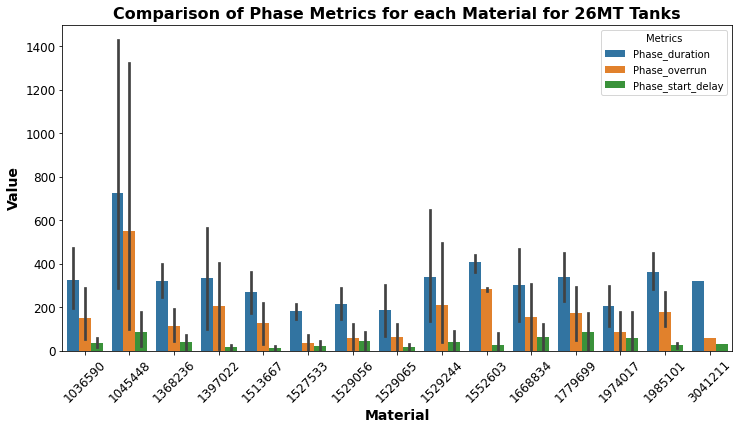

In [12]:
df = pd.DataFrame(aggregated_ProductionTank26_df2)

# Melt the data to get it in long form
df_melted = df.melt(id_vars='Material', value_vars=['Phase_duration', 'Phase_overrun', 'Phase_start_delay'])

# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Material', y='value', hue='variable', data=df_melted)
plt.title('Comparison of Phase Metrics for each Material for 26MT Tanks')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

In [13]:
## Examining the differences in production of materials that are common between all 25MT tanks

In [14]:
tanks_in_group1 = ['2601','2603','2604']
common_materials = aggregated_ProductionTank26_df2.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [15]:
filtered_data = aggregated_ProductionTank26_df2[aggregated_ProductionTank26_df2['Material'].isin(common_materials)]

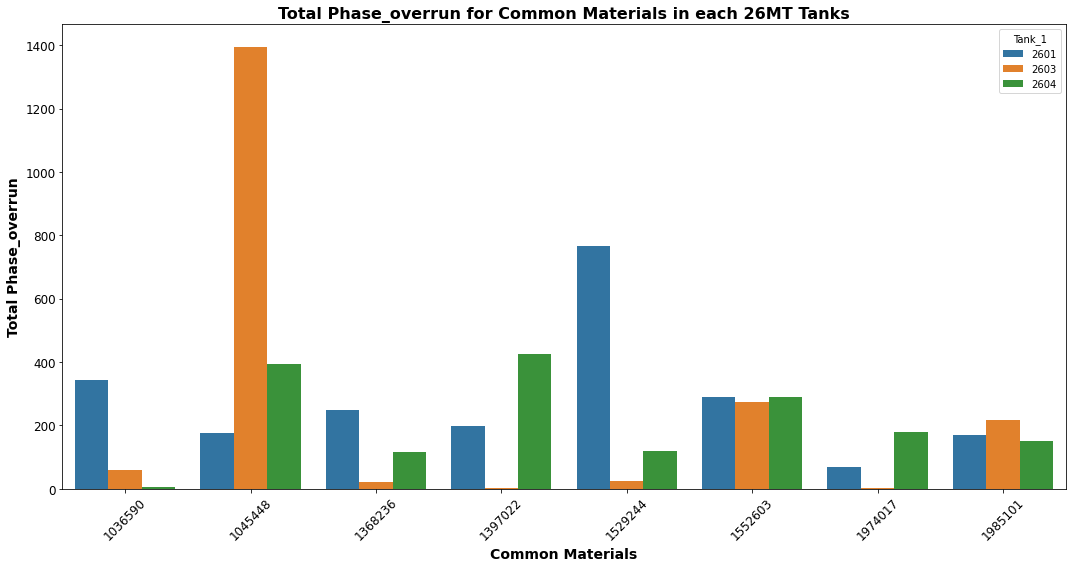

In [16]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Total Phase_overrun for Common Materials in each 26MT Tanks')
plt.ylabel('Total Phase_overrun')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

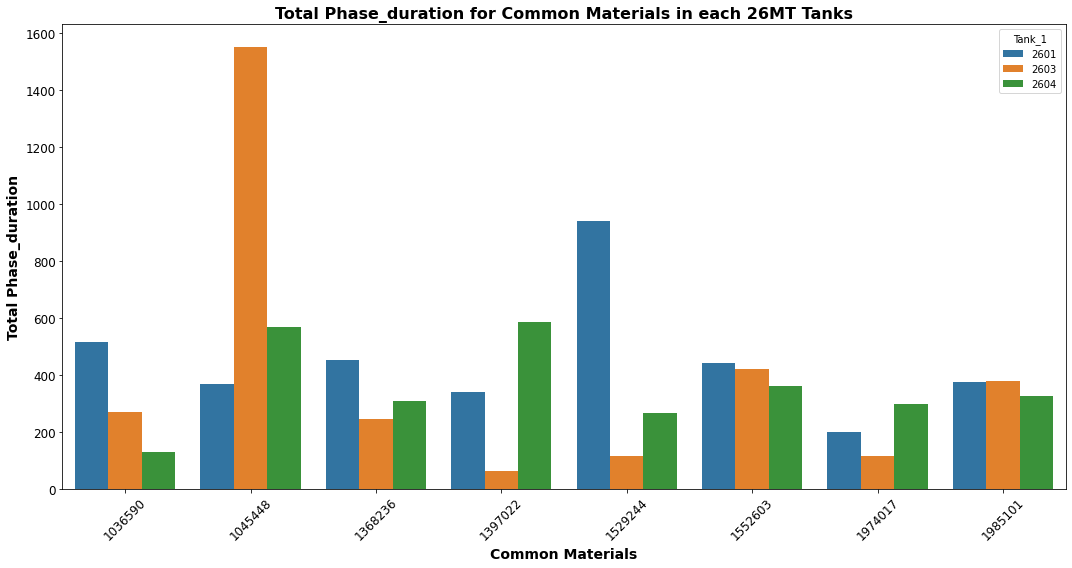

In [17]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Total Phase_duration for Common Materials in each 26MT Tanks')
plt.ylabel('Total Phase_duration')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

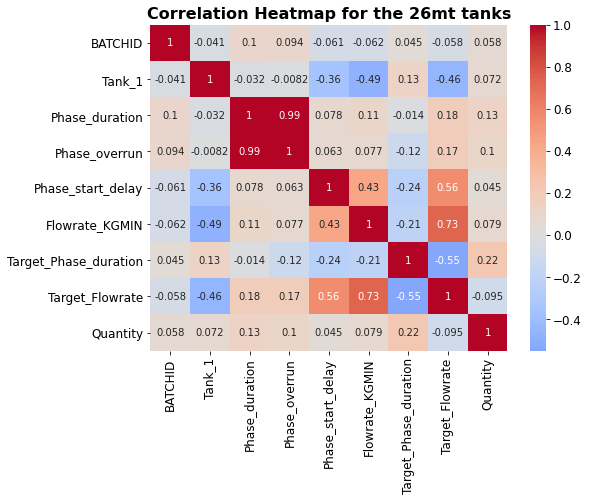

In [18]:
correlation_matrix = aggregated_ProductionTank26_df1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap for the 26mt tanks")
plt.show()

In [19]:
# Handling missing values
aggregated_ProductionTank26_df1.dropna(inplace=True)  # Remove rows with missing values

In [20]:
# Handling duplicates
aggregated_ProductionTank26_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [21]:
# Define columns where you want to detect and remove outliers
ProductionTank26_df2 = pd.DataFrame(aggregated_ProductionTank26_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank26_df2 = remove_outliers_iqr(ProductionTank26_df2, col)

# Display the cleaned DataFrame
print(ProductionTank26_df2)

       BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0    107559262    2601             186           14.0                  4   
1    107559262    2604             487          294.0               1303   
2    107579279    2601             412          251.0               1078   
4    107588989    2603             176           31.0                  5   
5    107588989    2604             364          221.0                253   
..         ...     ...             ...            ...                ...   
100  108060668    2604             174            5.0                  3   
101  108080114    2601             338          161.0                530   
103  108080114    2604             193           25.0                  4   
104  108081814    2601             343           57.0                  7   
106  108081814    2604             336          126.0                308   

     Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  Quantity  
0          2.50

In [22]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank26_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank26_df2.describe())

Original DataFrame Summary Statistics:
            BATCHID       Tank_1  Phase_duration  Phase_overrun  \
count  8.300000e+01    83.000000       83.000000      83.000000   
mean   1.078119e+08  2602.228916      377.638554     190.975904   
std    1.532097e+05     1.328169      279.162230     266.842969   
min    1.075593e+08  2601.000000      139.000000       0.000000   
25%    1.076958e+08  2601.000000      200.500000      28.000000   
50%    1.077923e+08  2601.000000      323.000000     124.000000   
75%    1.079368e+08  2604.000000      424.000000     243.000000   
max    1.080818e+08  2604.000000     1725.000000    1618.000000   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count          83.000000       83.000000              83.000000   
mean          630.228916        4.949187              23.513142   
std          1071.679686        3.128732              14.264674   
min             3.000000        0.859233              12.538462   
25%             4.0000

In [23]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
aggregated_ProductionTank26_df1[numerical_cols] = scaler.fit_transform(aggregated_ProductionTank26_df1[numerical_cols])
print(aggregated_ProductionTank26_df1.head())

     BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107559262    2601       -0.690651      -0.667253          -0.587896   
1  107559262    2604        0.394130       0.388432           0.631589   
2  107579279    2601        0.123836       0.226309           0.420362   
4  107588989    2603       -0.726690      -0.603158          -0.586957   
5  107588989    2604       -0.049152       0.113200          -0.354138   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  Quantity  
0       -0.786487              30.500000        14.857700  2403.216  
1        0.625493              15.153846        21.451189  2403.216  
2        1.014581              13.916667        19.410362  1201.289  
4       -1.066363              26.666667        14.857700  1802.810  
5       -0.583495              13.545455        20.058271  1802.810  


In [24]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank26_df2[numerical_cols] = scaler.fit_transform(ProductionTank26_df2[numerical_cols])
print(ProductionTank26_df2.head())

     BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107559262    2601       -1.010925      -0.989836          -0.854866   
1  107559262    2604        1.618991       1.551287           1.604207   
2  107579279    2601        0.963696       1.161043           1.178271   
4  107588989    2603       -1.098297      -0.835554          -0.852973   
5  107588989    2604        0.544308       0.888780          -0.383496   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  Quantity  
0       -0.752411              30.500000        14.857700  2403.216  
1        0.717984              15.153846        21.451189  2403.216  
2        1.123169              13.916667        19.410362  1201.289  
4       -1.043867              26.666667        14.857700  1802.810  
5       -0.541022              13.545455        20.058271  1802.810  


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
rf_feature_importance = rf_model.feature_importances_

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
gb_feature_importance = gb_model.feature_importances_

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('26results.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           | 0.03133     |  0.0383745 |   0.964206 |  0.974179 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            | 0.0317778   |  0.0293696 |   0.963695 |  0.980238 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            | 0.598973    |  0.954085  |   0.315689 |  0.358033 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     | 0.00944357  |  0.133772  |   0.989211 |  0.90999  |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost

In [26]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")
    
    # Save the results to an Excel file
df.to_excel("26MTmodel_results.xlsx", index=False)
#a file named model_results.xlsx in the current working directory containing the mean and standard deviation of the MSE for each model. You can then open this file with Excel to view the results.

   

LinearRegression:
  Mean MSE: 0.045994
  Std MSE: 0.016575

Ridge:
  Mean MSE: 0.045995
  Std MSE: 0.014889

Lasso:
  Mean MSE: 0.708712
  Std MSE: 0.195675

RandomForestRegressor:
  Mean MSE: 0.088241
  Std MSE: 0.034595

GradientBoostingRegressor:
  Mean MSE: 0.071225
  Std MSE: 0.027629

SVR:
  Mean MSE: 1.085704
  Std MSE: 0.387148

MLPRegressor:
  Mean MSE: 3733433239192.936523
  Std MSE: 5507499441991.699219

DecisionTreeRegressor:
  Mean MSE: 0.125239
  Std MSE: 0.043013

AdaBoostRegressor:
  Mean MSE: 0.088934
  Std MSE: 0.036726

BaggingRegressor:
  Mean MSE: 0.086176
  Std MSE: 0.038001



In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df2)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)
print(f"Best parameters for Ridge Regression: {ridge_grid.best_params_}")

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)
print(f"Best parameters for Lasso Regression: {lasso_grid.best_params_}")

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
print(f"Best parameters for Random Forest Regressor: {rf_grid.best_params_}")

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
print(f"Best parameters for Gradient Boosting Regressor: {gb_grid.best_params_}")

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)
print(f"Best parameters for Decision Tree Regressor: {dt_grid.best_params_}")

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)
print(f"Best parameters for Bagging Regressor: {bag_grid.best_params_}")

# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
#ada_best = ada_grid.best_estimator_

# Use the best estimator to make predictions
#ada_pred_train = best_ada.predict(X_train)
#ada_pred_test = best_ada.predict(X_test)

ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('26 TUN results.xlsx', index=False)

Best parameters for Ridge Regression: {'alpha': 0.1}
Best parameters for Lasso Regression: {'alpha': 0.01}
Best parameters for Random Forest Regressor: {'max_depth': 20, 'n_estimators': 200}
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best parameters for Decision Tree Regressor: {'max_depth': 20}
Best parameters for Bagging Regressor: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
                         Model     Train MSE  Test MSE  Train R2   Test R2
0            Linear Regression  4.027414e-02  0.019224  0.953988  0.987065
1             Ridge Regression  4.027804e-02  0.019197  0.953983  0.987083
2             Lasso Regression  4.066366e-02  0.019744  0.953543  0.986715
3      Random Forest Regressor  1.033732e-02  0.142722  0.988190  0.903968
4  Gradient Boosting Regressor  3.344526e-09  0.073629  1.000000  0.950458
5      Decision Tree Regressor  0.000000e+00  0.168895  1.000000  0.886357
6          

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

# Assuming you've loaded 'ProductionTank22_df2' somewhere in your code
df = pd.DataFrame(ProductionTank26_df2)

X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2', 'CV MSE Mean', 'CV MSE Std'])

# Function to perform model training, prediction and storing results
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results_df.loc[name] = [name, train_mse, test_mse, train_r2, test_r2, cv_mean, cv_std]

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, 'K-Nearest Neighbors')

# Support Vector Machine
svm_model = SVR(kernel='rbf')
evaluate_model(svm_model, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('knn_svm_results.xlsx', index=False)

def hypertune_model(model, params, name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    evaluate_model(best_model, name)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
hypertune_model(KNeighborsRegressor(), knn_params, 'K-Nearest Neighbors')

# Support Vector Machine
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
hypertune_model(SVR(), svm_params, 'Support Vector Machine')

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('26MTknn_svm_results_hyper_tuned.xlsx', index=False)

+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
|                        | Model                  |   Train MSE |   Test MSE |   Train R2 |   Test R2 |   CV MSE Mean |   CV MSE Std |
+========================+========================+=============+============+============+===========+===============+==============+
| K-Nearest Neighbors    | K-Nearest Neighbors    |   0.156002  |   0.318385 |   0.821772 |  0.785771 |      0.325375 |    0.11588   |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
| Support Vector Machine | Support Vector Machine |   0.0210791 |   0.433895 |   0.975918 |  0.708049 |      0.122491 |    0.0357606 |
+------------------------+------------------------+-------------+------------+------------+-----------+---------------+--------------+
Fitting 5 folds for each of 32 candidates, totalling 16

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df2)

# Define features and target
#X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Simple Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

print(tabulate(results_df, headers='keys', tablefmt='grid'))

results_df.to_excel('Simple Neural Network.xlsx', index=False)

from keras.layers import LSTM

# Assuming X_train_scaled and X_test_scaled are already prepared

# Reshape input data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the LSTM
lstm = build_lstm()
lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_lstm = lstm.predict(X_train_reshaped)
pred_test_lstm = lstm.predict(X_test_reshaped)
train_mse_lstm = mean_squared_error(y_train, pred_train_lstm)
test_mse_lstm = mean_squared_error(y_test, pred_test_lstm)
train_r2_lstm = r2_score(y_train, pred_train_lstm)
test_r2_lstm = r2_score(y_test, pred_test_lstm)
results_df = results_df.append({'Model': 'LSTM Neural Network', 'Train MSE': train_mse_lstm,
                                'Test MSE': test_mse_lstm, 'Train R2': train_r2_lstm, 'Test R2': test_r2_lstm},
                               ignore_index=True)
print(tabulate(results_df, headers='keys', tablefmt='grid'))


results_df.to_excel('26MTLSTM  SIMPLE Neural Network.xlsx', index=False)

1/1 [==============================] - 0s 26ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |   0.0192996 |  0.0801576 |   0.977951 |  0.946065 |
+----+-----------------------+-------------+------------+------------+-----------+
1/1 [==============================] - 0s 30ms/step
+----+-----------------------+-------------+------------+------------+-----------+
|    | Model                 |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=======================+=============+============+============+===========+
|  0 | Simple Neural Network |   0.0192996 |  0.0801576 |   0.977951 |  0.946065 |
+----+-----------------------+-------------+------------+------------+-----------+
|  1 | LSTM Neural Network   |   0.245947  |  0.596899  |   0.7190

In [30]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# ... [your data loading, preprocessing, etc.]

# Define a parameter grid to search through
param_grid = {
    'dense1_neurons': [32, 64, 128],
    'dense2_neurons': [16, 32, 64],
    'epochs': [30, 50],
    'batch_size': [16, 32, 64],
}

# Adjust the function to take the hyperparameters as parameters
def build_simple_nn(dense1_neurons=64, dense2_neurons=32):
    model = Sequential()
    model.add(Dense(dense1_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(dense2_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
simple_nn_model = KerasRegressor(build_fn=build_simple_nn, verbose=0)

# GridSearchCV
simple_nn_search = GridSearchCV(estimator=simple_nn_model, param_grid=param_grid, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Predict using the best model on training data
train_preds = simple_nn_search.best_estimator_.predict(X_train_scaled)

# Calculate the MSE and R2 for the training data
train_mse = mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Predict using the best model on test data
test_preds = simple_nn_search.best_estimator_.predict(X_test_scaled)

# Calculate the MSE and R2 for the test data
test_mse = mean_squared_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the results
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)

# Here, you can use simple_nn_search_result.best_estimator_ to make predictions and evaluate the model.

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Simple NN Params: {'batch_size': 16, 'dense1_neurons': 64, 'dense2_neurons': 32, 'epochs': 50}
Training MSE: 0.009370599875168724
Training R^2: 0.9892943446176856
Test MSE: 0.023966249391301132
Test R^2: 0.9838740350197145


In [31]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model for grid search
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Grid search hyperparameters
lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Print the best parameters
print("Best LSTM Params:", lstm_search_result.best_params_)

# Predict using the best model on training data
train_preds_lstm = lstm_search_result.best_estimator_.predict(X_train_reshaped)

# Calculate the MSE and R2 for the training data
train_mse_lstm = mean_squared_error(y_train, train_preds_lstm)
train_r2_lstm = r2_score(y_train, train_preds_lstm)

# Predict using the best model on test data
test_preds_lstm = lstm_search_result.best_estimator_.predict(X_test_reshaped)

# Calculate the MSE and R2 for the test data
test_mse_lstm = mean_squared_error(y_test, test_preds_lstm)
test_r2_lstm = r2_score(y_test, test_preds_lstm)

# Print the results
print("Training MSE for LSTM:", train_mse_lstm)
print("Training R^2 for LSTM:", train_r2_lstm)
print("Test MSE for LSTM:", test_mse_lstm)
print("Test R^2 for LSTM:", test_r2_lstm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best LSTM Params: {'batch_size': 16, 'epochs': 100, 'lstm_neurons': 70}
Training MSE for LSTM: 0.01355946401305135
Training R^2 for LSTM: 0.9845086813196142
Test MSE for LSTM: 0.020665902486087847
Test R^2 for LSTM: 0.9860947111775609


In [34]:
#!pip install -U keras-tuner
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters grid for Simple Neural Network
def create_simple_nn(neurons_layer1=64, neurons_layer2=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

simple_nn_param_grid = {
    'neurons_layer1': [32, 64, 128],
    'neurons_layer2': [16, 32, 64],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

simple_nn_model = KerasRegressor(build_fn=create_simple_nn, verbose=0)
simple_nn_search = RandomizedSearchCV(estimator=simple_nn_model, param_distributions=simple_nn_param_grid, n_iter=5, cv=3, verbose=1)
simple_nn_search_result = simple_nn_search.fit(X_train_scaled, y_train)

# Display results for Simple NN
simple_nn_results = pd.DataFrame(simple_nn_search_result.cv_results_)[['param_neurons_layer1', 'param_neurons_layer2', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(simple_nn_results, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
simple_nn_results.to_excel('simple_nn.xlsx', index=False)
print("Best Simple NN Params:", simple_nn_search_result.best_params_)

# Define hyperparameters grid for LSTM
def create_lstm(lstm_neurons=50):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_param_grid = {
    'lstm_neurons': [30, 50, 70],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

lstm_model = KerasRegressor(build_fn=create_lstm, verbose=0)
lstm_search = RandomizedSearchCV(estimator=lstm_model, param_distributions=lstm_param_grid, n_iter=5, cv=3, verbose=1)
lstm_search_result = lstm_search.fit(X_train_reshaped, y_train)

# Display results for LSTM
lstm_results = pd.DataFrame(lstm_search_result.cv_results_)[['param_lstm_neurons', 'param_batch_size', 'param_epochs', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(tabulate(lstm_results, headers='keys', tablefmt='grid'))
print("Best LSTM Params:", lstm_search_result.best_params_)
# Save results DataFrame to an Excel file
lstm_results.to_excel('26MTLSTM_results.xlsx', index=False)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|    |   param_neurons_layer1 |   param_neurons_layer2 |   param_batch_size |   param_epochs |   mean_test_score |   std_test_score |   rank_test_score |
+====+========================+========================+====================+================+===================+==================+===================+
|  0 |                    128 |                     16 |                 64 |             30 |        -0.157506  |        0.0550808 |                 5 |
+----+------------------------+------------------------+--------------------+----------------+-------------------+------------------+-------------------+
|  1 |                    128 |                     16 |                 16 |             50 |        -0.0871324 |        0.0285688 |                 3 |
+----+----------

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Dense Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('neural_network_results1.xlsx', index=False)

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(neurons_layer3, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [20, 50, 100],
    'neurons_layer1': [64, 128, 256],
    'neurons_layer2': [32, 64, 128],
    'neurons_layer3': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train_scaled, y_train)

print("Best Score: ", random_search_result.best_score_)
print("Best Params: ", random_search_result.best_params_)

best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)
#Remember that the parameters given above are just examples; you can expand or restrict the grid as per your computational capability and needs. Also, depending on the number of combinations and the size of your data, this can take a significant amount of time to run.


best_nn = random_search_result.best_estimator_.model
pred_train_best_nn = best_nn.predict(X_train_scaled)
pred_test_best_nn = best_nn.predict(X_test_scaled)

train_mse_best_nn = mean_squared_error(y_train, pred_train_best_nn)
test_mse_best_nn = mean_squared_error(y_test, pred_test_best_nn)
train_r2_best_nn = r2_score(y_train, pred_train_best_nn)
test_r2_best_nn = r2_score(y_test, pred_test_best_nn)

results_df = results_df.append({'Model': 'Dense Neural Network (Optimized)', 'Train MSE': train_mse_best_nn,
                                'Test MSE': test_mse_best_nn, 'Train R2': train_r2_best_nn, 'Test R2': test_r2_best_nn},
                               ignore_index=True)

results_df.to_excel('26MTdenseNN_results.xlsx', index=False)

print(tabulate(results_df, headers='keys', tablefmt='grid'))


1/1 [==============================] - 0s 26ms/step
+----+----------------------+-------------+------------+------------+-----------+
|    | Model                |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+======================+=============+============+============+===========+
|  0 | Dense Neural Network |  0.00291985 |   0.020731 |   0.996664 |  0.986051 |
+----+----------------------+-------------+------------+------------+-----------+
Best Score:  -0.06579430649677913
Best Params:  {'neurons_layer3': 64, 'neurons_layer2': 32, 'neurons_layer1': 256, 'epochs': 100, 'batch_size': 32}
1/1 [==============================] - 0s 28ms/step
+----+----------------------------------+-------------+------------+------------+-----------+
|    | Model                            |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+==================================+=============+============+============+===========+
|  0 | Dense Neural Network             | 0.00291985  |

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank26_df2)

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Initialize k-fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define the models to be evaluated
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42)
]

# Iterate through each model and perform k-fold cross-validation
for model in models:
    model_name = model.__class__.__name__
    train_mse_list = []
    test_mse_list = []
    train_r2_list = []
    test_r2_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
    
    mean_train_mse = sum(train_mse_list) / num_folds
    mean_test_mse = sum(test_mse_list) / num_folds
    mean_train_r2 = sum(train_r2_list) / num_folds
    mean_test_r2 = sum(test_r2_list) / num_folds
    
    results_df = results_df.append({'Model': model_name, 'Train MSE': mean_train_mse, 'Test MSE': mean_test_mse,
                                    'Train R2': mean_train_r2, 'Test R2': mean_test_r2}, ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('26mtkfold_results.xlsx', index=False)